Group 1: Avg IC: 0.0409
Group 2: Avg IC: 0.0428
Group 3: Avg IC: 0.0508
Group 4: Avg IC: 0.0417
Group 5: Avg IC: 0.0393
Group 6: Avg IC: 0.0628
Group 7: Avg IC: 0.0412
Group 8: Avg IC: 0.0410
Group 9: Avg IC: 0.0491


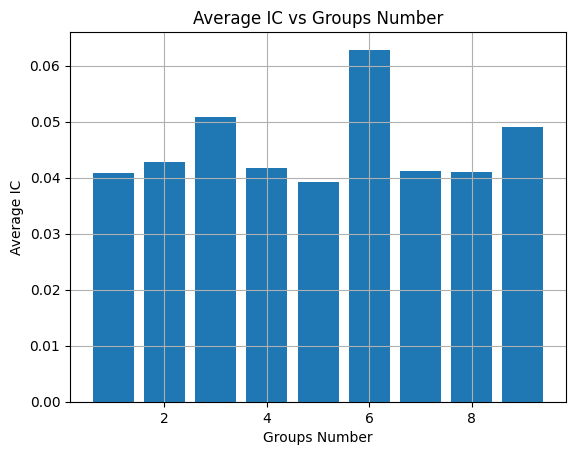

In [35]:
import matplotlib.pyplot as plt

def calculate_IC(text):
    Alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    counts = {char: 0 for char in Alphabet}
    numerator = 0
    denominator = len(text) * (len(text) - 1)
    for char in text:
        if char in Alphabet:
            counts[char] += 1
            
    for char in Alphabet:
        numerator += counts[char] * (counts[char] - 1)
    return numerator / denominator

def divide_text(text, n):
    return [text[i::n] for i in range(n)]

text = 'KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST'

num_groups = range(1, 10)
average_ICs = []

for i in num_groups:
    groups = divide_text(text, i)
    group_IC = {i: calculate_IC(group) for i, group in enumerate(groups)}
    average_IC = sum(group_IC.values()) / len(group_IC)
    average_ICs.append(average_IC)
    print(f'Group {i}: Avg IC: {average_IC:.4f}')

# Graficar los valores de average_IC vs número de grupos como un diagrama de barras
plt.bar(num_groups, average_ICs)
plt.xlabel('Groups Number')
plt.ylabel('Average IC')
plt.title('Average IC vs Groups Number')
plt.grid(True)
plt.show()

Now, we know that the most probable key lenght is 6. We can use the Kasiski examination to find the key. The Kasiski examination is a method of attacking polyalphabetic substitution ciphers. It is based on the fact that in a polyalphabetic substitution cipher, the same plaintext letter will sometimes be enciphered by different cipher letters, depending on its position in the message. This will happen most often with the same plaintext letters that are separated by a multiple of the key length.

Group: 1 : KGQNGVGGTGCQWAWQHNJEPJTKQFWAPJGHPWKCTAQVNCIVJFVNIVCPQJQJT


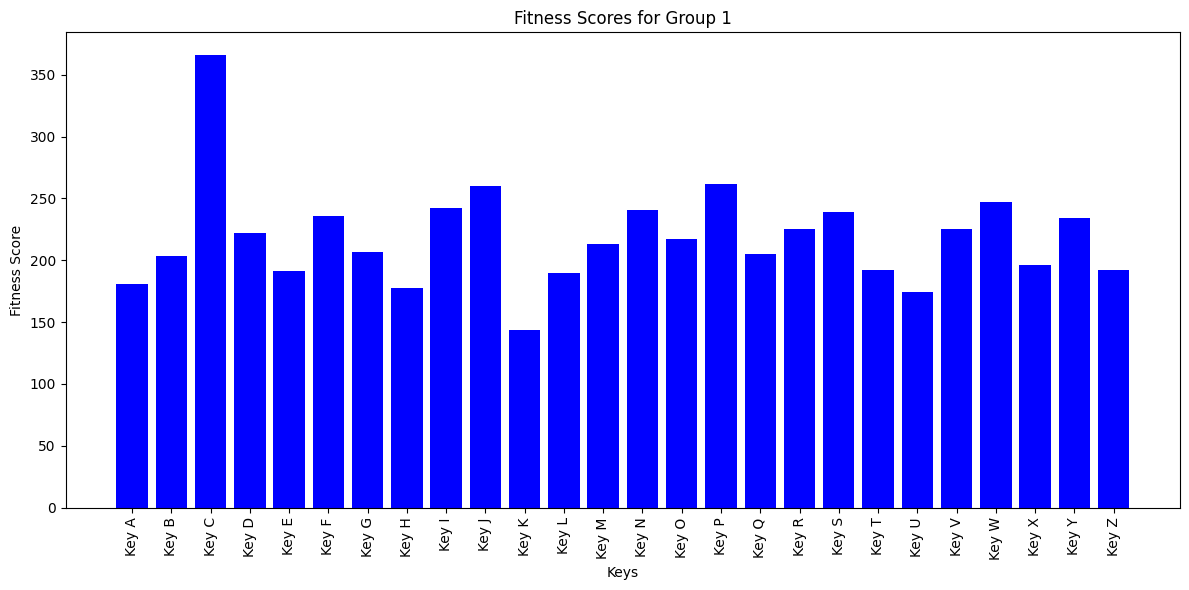

Group: 2 : CUTRRFIUFEKCCKRKKCVTKVRCDRSFRRKFZTEEJFNYWKKKVFYVRFDFIVIV


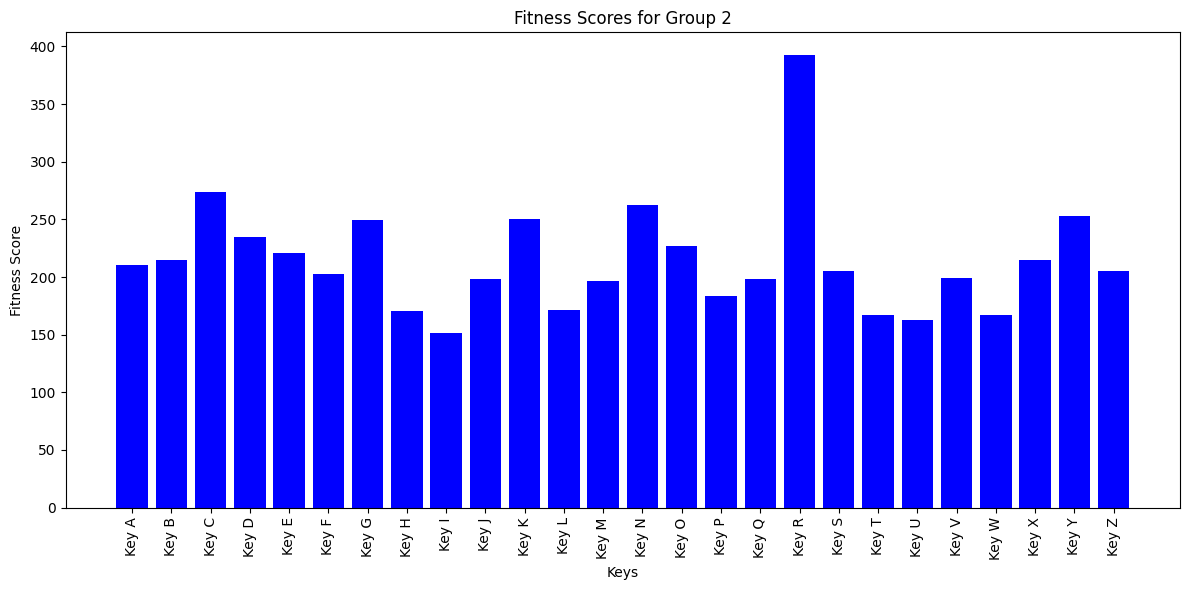

Group: 3 : CFYRKDLDMGQWRFPYFQAMQDLGZLJSJJMPLFBBRSRCDAFCLSCREEYDYLBN


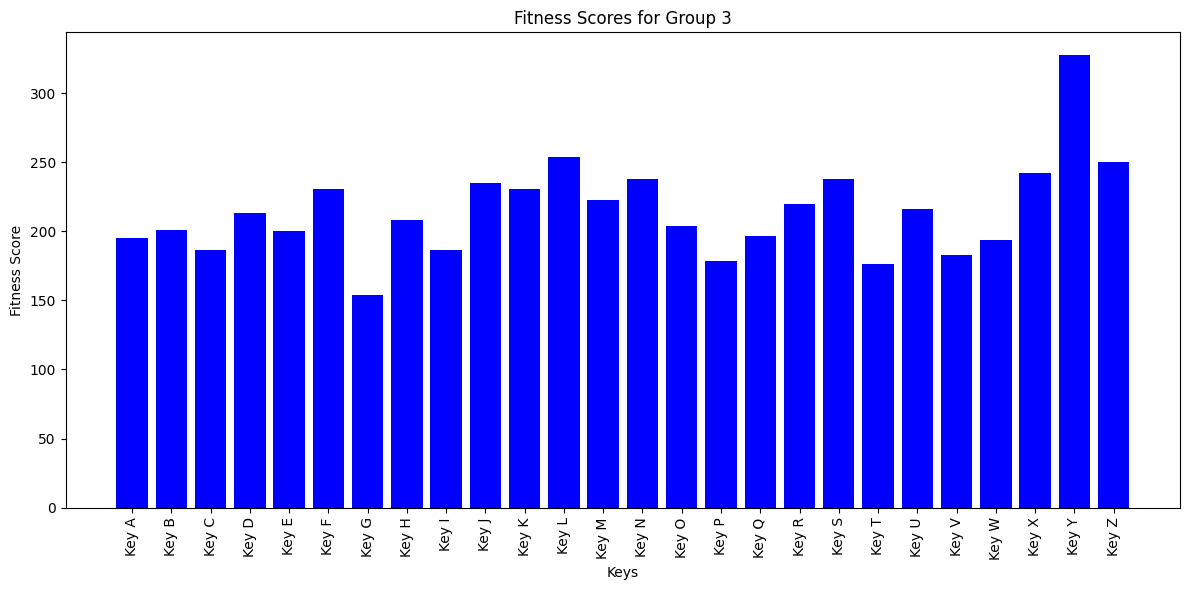

Group: 4 : PDATDETDBLRDXTTVTQJCDASCXSTIAUIDVPDSWPWGDWTGNQLWPXGTCNTP


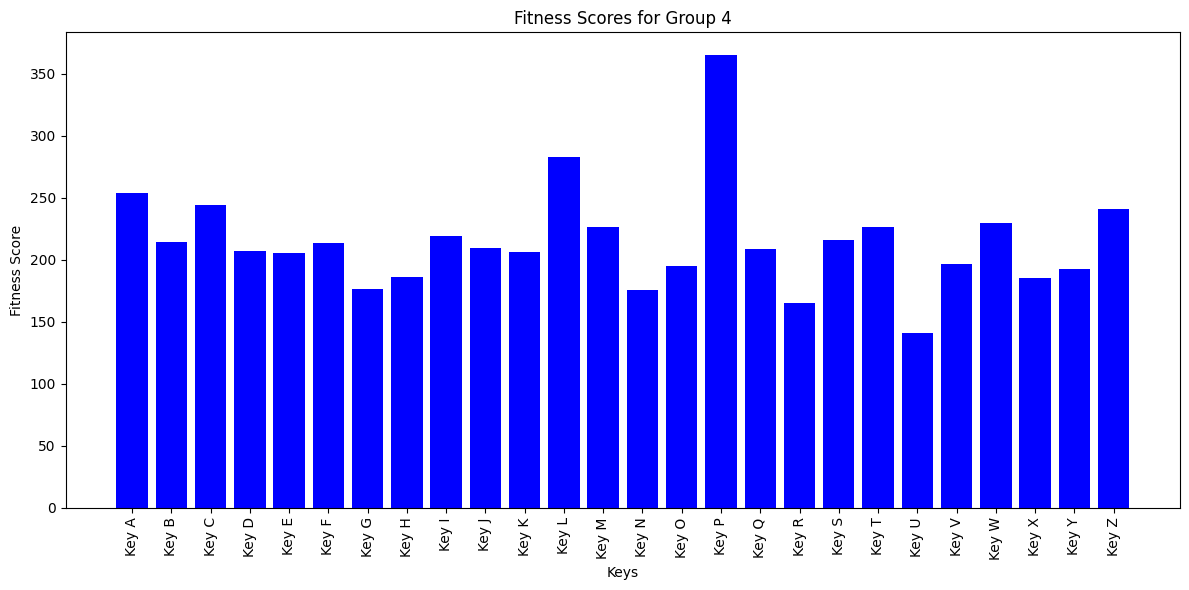

Group: 5 : KPVMNTXKPTANILYXPRUMYHVZGWBAHMTILLPHXEXAKBIGHEABBOZKWHKI


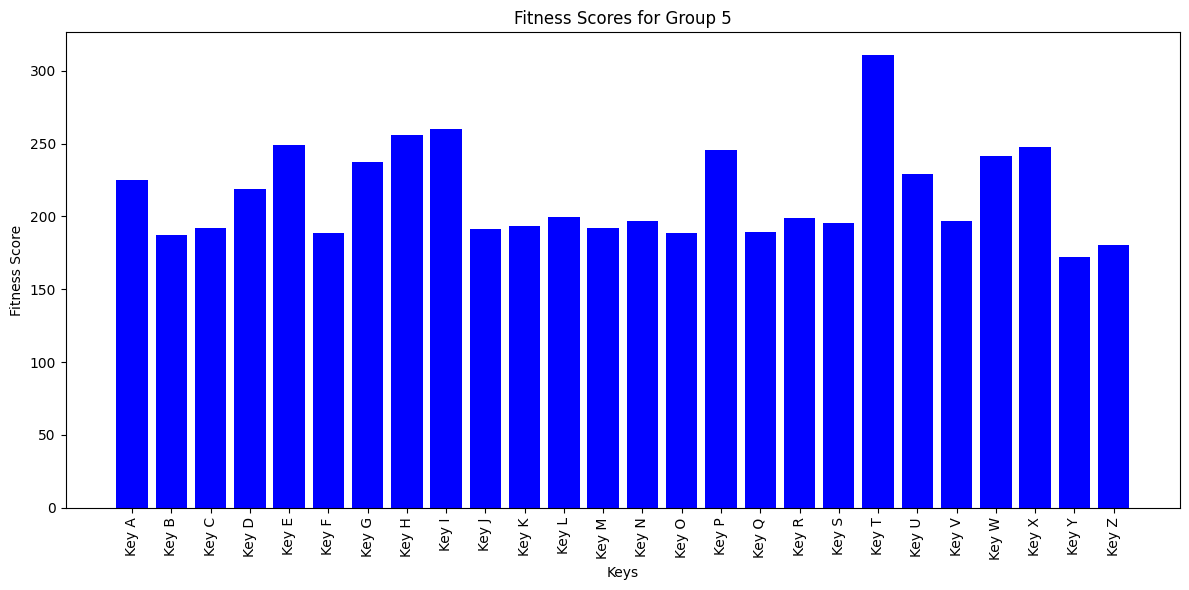

Group: 6 : BHIVBDROVGCAZECCOHWSHCSQSCHSKVZSGKGCBZCOABOHISCBBSWFHIHS


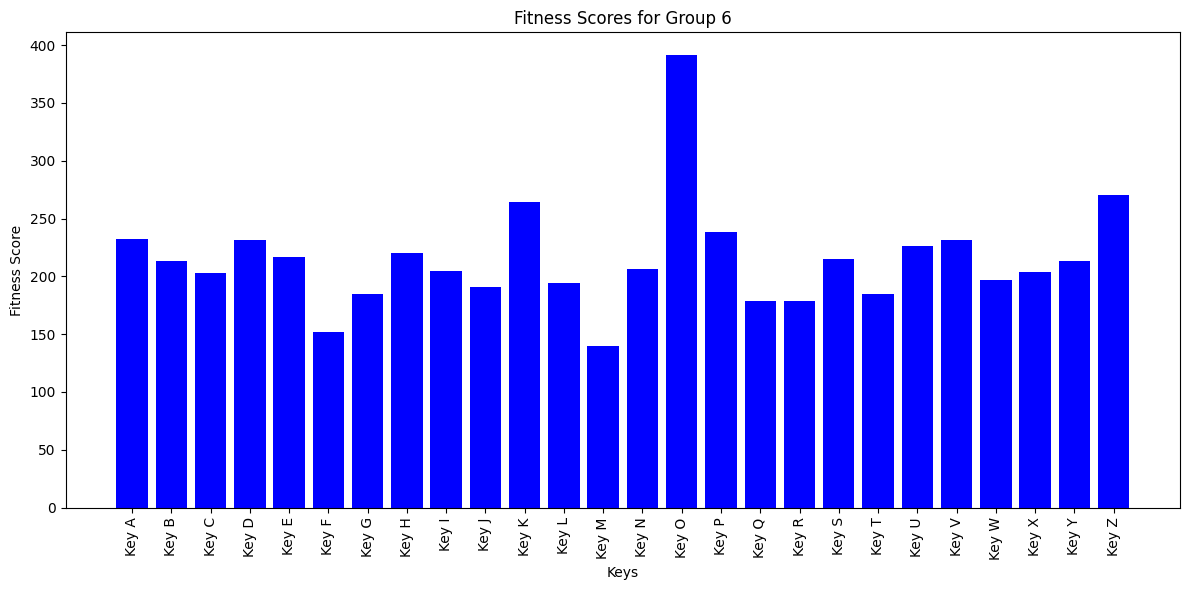

In [36]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes la función divide_text(text, n)
groups = divide_text(text, 6)

# Función de fitness que cuenta las letras en inglés
def fitness(pt):
    english_frequencies = {
        'E': 12.02, 'T': 9.10, 'A': 8.12, 'O': 7.68,
        'I': 7.00, 'N': 6.95, 'S': 6.28, 'H': 6.09,
        'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78,
        'U': 2.76, 'M': 2.41, 'W': 2.36, 'F': 2.23,
        'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49,
        'V': 0.98, 'K': 0.77, 'J': 0.15, 'X': 0.15,
        'Q': 0.10, 'Z': 0.07
    }
    
    # Calcula el score basado en la frecuencia de letras en el texto plano
    score = 0
    for letter in pt:
        if letter in english_frequencies:
            score += english_frequencies[letter]
    return score

# Función para descifrar el texto cifrado con vigenere
def decrypt_vigenere(ciphertext, key):
    plaintext = ''
    key_length = len(key)
    for i, char in enumerate(ciphertext):
        key_char = key[i % key_length]
        shift = ord(key_char) - ord('A')
        plaintext += chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
    return plaintext

for i, group in enumerate(groups):
    # Crear listas para almacenar los datos para el histograma (reiniciar en cada grupo)
    keys = []
    scores = []
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for char in alphabet:
        key = char
        pt = decrypt_vigenere(group, key)
        fitness_score = fitness(pt)
        keys.append(f'Key {key}')  # Cambiado para que solo muestre la clave
        scores.append(fitness_score)
        #print(f'Group {i+1} Key {key}: {pt} (Fitness: {fitness_score:.2f})')
    print(f'Group: {i +1} : {group}')
    # Crear el histograma
    plt.figure(figsize=(12, 6))
    plt.bar(keys, scores, color='blue')
    plt.xlabel('Keys')
    plt.ylabel('Fitness Score')
    plt.title(f'Fitness Scores for Group {i+1}')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor legibilidad
    plt.tight_layout()  # Ajustar el layout
    plt.show()
